In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [29]:
df  = pd.read_csv('cars.csv')

In [30]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


## Pergunta 1

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [32]:
df.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

## Pergunta 2

In [100]:
df2 = df.copy()

In [101]:
df2['cubicinches'] = pd.to_numeric(df['cubicinches'],errors='coerce')
df2['weightlbs'] = pd.to_numeric(df['weightlbs'],errors='coerce')

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [73]:
df2.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

## Pegunta3 

In [75]:
lista =list()
lista2 =  []
for i in range(len(df['cubicinches'])):
    try:
        num = float(df['cubicinches'][i])
        lista.append(num)
    except:
        lista2.append(i)


In [76]:
lista2

[40, 180]

In [77]:
df.iloc[40:41,]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,,105,3897,19,1976,US.


In [78]:
df.iloc[180:181,]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
180,19.8,6,,85,2990,18,1980,US.


## Pergunta 4

In [79]:
df2.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [102]:
mean_1 = df2['weightlbs'].mean()
mean_2 = df2['cubicinches'].mean()

In [103]:
df2['weightlbs'].fillna(mean_1, inplace= True)

df2['cubicinches'].fillna(mean_2, inplace=True)

In [104]:
df2['weightlbs'].mean()

3009.8333333333335

In [105]:
df2['cubicinches'].mean()

200.91891891891893

In [106]:
df2.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [109]:
df2.mpg.median()

22.0

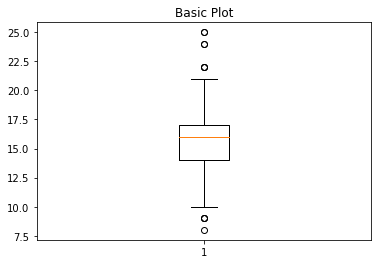

In [119]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df2['time-to-60'])
plt.show()

<AxesSubplot:>

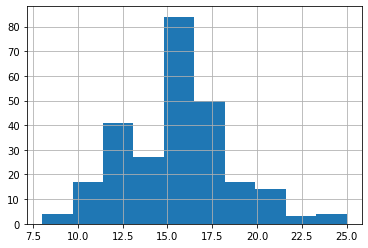

In [138]:
df2['time-to-60'].hist()

<AxesSubplot:>

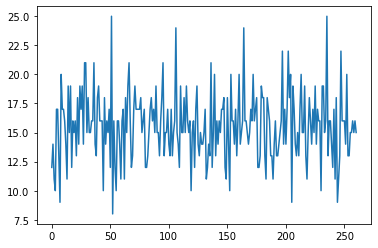

In [122]:
df2['time-to-60'].plot()

In [125]:
df.corr()

,mpg,cylinders,hp,time-to-60,year
mpg,1.000000,-0.776710,-0.774905,0.509070,0.550441
cylinders,-0.776710,1.000000,0.845155,-0.578161,-0.322239
hp,-0.774905,0.845155,1.000000,-0.744873,-0.383869
time-to-60,0.509070,-0.578161,-0.744873,1.000000,0.312311
year,0.550441,-0.322239,-0.383869,0.312311,1.000000


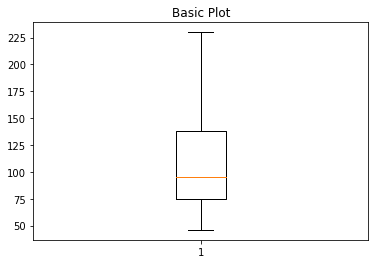

In [126]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df2['hp'])
plt.show()

In [135]:
scaler = StandardScaler()
hp = scaler.fit_transform(np.array(df2['hp']).reshape(-1,1))

In [136]:
np.max(hp)

3.05870398977614

In [137]:
df2.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [139]:
df2.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [140]:
X = df2[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60','year']]

In [142]:
X_norm = scaler.fit_transform(X)

In [144]:
X_norm.shape

(261, 7)

In [156]:
pd.DataFrame(X_norm)[3].max()

3.05870398977614

In [157]:
pca = PCA(n_components=7)

In [162]:
data = pca.fit_transform(X_norm)

In [161]:
pca.explained_variance_ratio_

array([0.72371349, 0.12675138, 0.09126131, 0.02773591, 0.01766794,
       0.00798425, 0.00488572])

In [199]:
data_kmeans = pd.DataFrame(data).iloc[:,0:3]

In [ ]:
pd.DataFrame(data).iloc[:,0:3]

## Pergunta 12

In [164]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [200]:
kmeans.fit(data_kmeans)

KMeans(n_clusters=3, random_state=42)

In [201]:
labels = kmeans.labels_

(array([ 77.,   0.,   0.,   0.,   0.,  75.,   0.,   0.,   0., 109.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

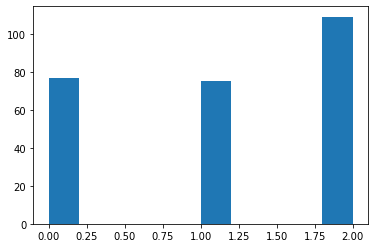

In [202]:
plt.hist(x =labels)

## Pergutna 13

In [188]:
df2.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,eficiecia
0,14.0,8,350.0,165,4209.0,12,1972,US.,1
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,0
2,17.0,8,302.0,140,3449.0,11,1971,US.,1
3,15.0,8,400.0,150,3761.0,10,1971,US.,1
4,30.5,4,98.0,63,2051.0,17,1978,US.,0


In [187]:
df2['eficiecia'] = np.where(df2.mpg >25,0,1)

(array([ 99.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 162.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

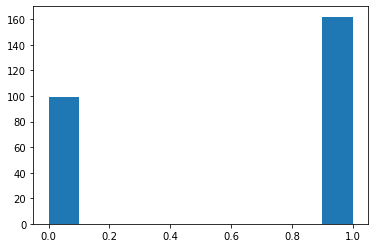

In [190]:
plt.hist(df2['eficiecia'])

In [233]:
df['cubicinches'] = pd.to_numeric(df['cubicinches'],errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'],errors='coerce')

In [243]:
mean_1 = df['weightlbs'].mean()
mean_2 = df['cubicinches'].mean()

df['weightlbs'].fillna(mean_1, inplace= True)

df['cubicinches'].fillna(mean_2, inplace=True)




In [244]:
X =  df[['cylinders' ,'cubicinches','hp' ,'weightlbs','time-to-60']]
df['eficiecia'] = np.where(df.mpg >25,0,1)
y = df['eficiecia']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)

In [246]:
X_train_norm = scaler.fit_transform(X_train)

In [247]:
arvore = DecisionTreeClassifier(random_state=42)
rlg = LogisticRegression(random_state=42) 

In [257]:
arvore.fit(X_train,y_train)
rlg.fit(X_train,y_train)

C:\Users\Vinicius\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [253]:
y_pred = arvore.predict(X_test)

In [258]:
from sklearn.metrics import classification_report, confusion_matrix

In [255]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.94      0.80      0.87        41

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



In [259]:
confusion_matrix(y_test,y_pred)

array([[36,  2],
       [ 8, 33]], dtype=int64)

In [260]:
y_pred = rlg.predict(X_test)

In [261]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        38
           1       0.86      0.88      0.87        41

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79



In [262]:
confusion_matrix(y_test,y_pred)

array([[32,  6],
       [ 5, 36]], dtype=int64)